In [1]:
import geopandas as gpd
import pandas as pd
import seaborn
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
location = #fill it in
attempt = pd.read_csv(location)

In [3]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geo_df = GeoDataFrame(attempt.where((pd.notnull(attempt)), None))

In [4]:
from shapely.geometry import Polygon

def str_to_polygon(string):
    first = string[10:]
    first = first.replace(",","")
    first = first.replace("(","")
    first = first.replace(")","") #first is to remove everything but floats and spaces. Can be more simple
    second = first.split(" ")     #second makes first into and array
    temp = []
    for i in second:
        temp.append(float(i))
    zip1 = []
    zip2 = []
    for i in range(len(temp)):
        if i%2 == 0:
            zip1.append(temp[i])
        else:
            zip2.append(temp[i])
    final_data = zip(zip1, zip2)
    final = Polygon(final_data)
    return final



In [5]:
for i in range(len(geo_df['geometry'])):
    geo_df['geometry'][i]=str_to_polygon(geo_df['geometry'][i])
    

C:\Users\mmxc2\Miniconda2\envs\default\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


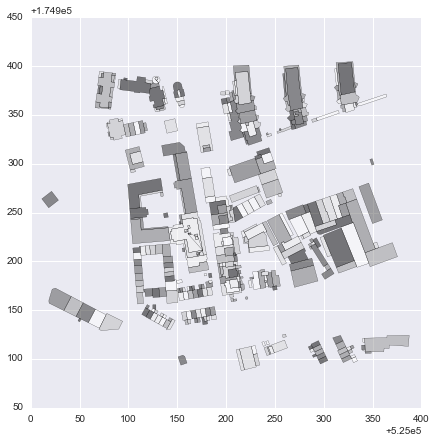

In [6]:
geo_df.plot(linewidth=0.2)